7.Use digits dataset consisting of 8x8 pixels (i.e. 64 dimensions) handwritten digits images. Your task is to apply PCA to reduce the dimensions of the dataset. Visualize the PCA results.

8.Using the dataset of Q7. Impute some noise in the dataset. Visualize the dataset with and  without noise. Then apply PCA on noisy dataset to remove the noise.

In [1]:
#importing digit dataset
from sklearn.datasets import load_digits 
digits=load_digits() 

In [2]:
#applying pca on the dataset
from sklearn.decomposition import PCA 
pca=PCA(n_components=2) 
components=pca.fit_transform(digits.data) 
print(digits.data.shape) 
print(components.shape) 

(1797, 64)
(1797, 2)


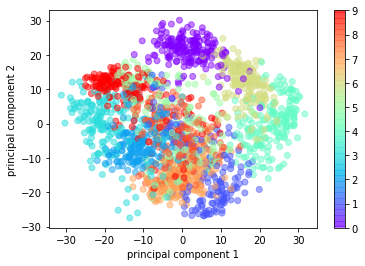

In [3]:
#plotting pca components
import matplotlib.pyplot as plt 
plt.scatter(components[:,0],components[:,1],c=digits.target, alpha=0.5,cmap='rainbow') 
plt.xlabel('principal component 1') 
plt.ylabel('principal component 2') 
plt.colorbar() 

Text(0, 0.5, 'cumulative explained variance')

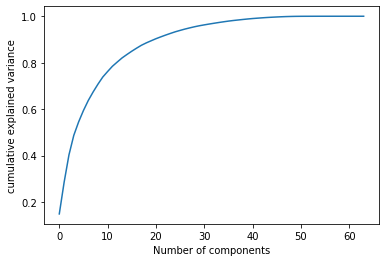

In [4]:
#plot pca components against variance
import numpy as np 
pca=PCA().fit(digits.data) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('Number of components') 
plt.ylabel('cumulative explained variance')

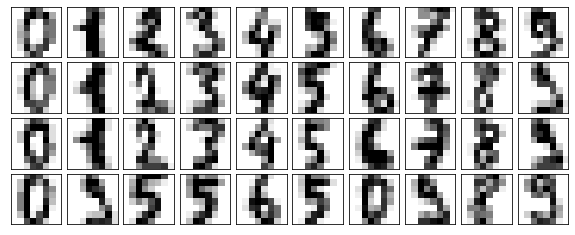

In [6]:
#plotting digits data
def plot_digits(data):
    fig, axes=plt.subplots(4, 10, figsize=(10,4),
                             subplot_kw={'xticks':[],'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary',interpolation='nearest')
plot_digits(digits.data)

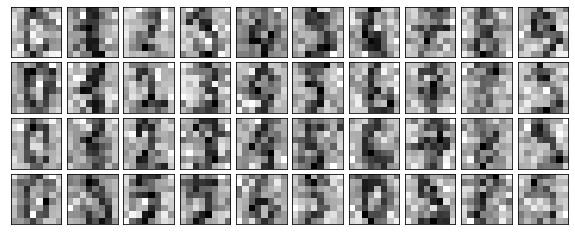

In [7]:
#imputing noise to the dataset
np.random.seed(42) 
noisy=np.random.normal(digits.data, 4) 
plot_digits(noisy) 

In [9]:
#applying pca to remove noise from the dataset
pca=PCA(0.50).fit(noisy) 
pca.n_components_ 

12

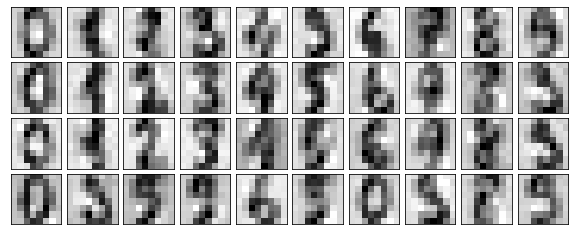

In [10]:
#plotting the filtered dataset
components=pca.transform(noisy) 
filtered=pca.inverse_transform(components) 
plot_digits(filtered)